# Study of the operation of algorithms ( Kruskal algorithm, Floyd-Warshall algorithm )

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Import needed libraries

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from tqdm import tqdm
import math
from typing import List, Tuple

#### Graph generation function

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G

# Kruskal algorithm

#### Task: write a function that will implement Kruskal's algorithm taking as an argument a graph generated using the module provided in the task (function gnp_random_connected_graph). Then compare developed algorithm with native one from imported library

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [4]:
#generate random graph
G_kruskal = gnp_random_connected_graph(10, 1, False, False)

In [5]:
def kruskals_algorithm(graph_edges):
    """
    Kruskal's algorithm impemetation
    """
    sorted_graph = sorted(graph_edges, key= lambda x: x[2].get('weight'))
    connected_nodes_groups = {}
    already_connected_nodes = []
    min_frame = []
    for edge in sorted_graph:
        if not edge[0] in already_connected_nodes or not edge[1] in already_connected_nodes: # checking if one of the nodes are not connected
            if not edge[0] in already_connected_nodes and not edge[1] in already_connected_nodes: # checking for both
                connected_nodes_groups[edge[0]] = [edge[0], edge[1]] # connect two nodes with each other
                connected_nodes_groups[edge[1]] = [edge[0], edge[1]]
            else:
                if not connected_nodes_groups.get(edge[0]):
                    connected_nodes_groups[edge[1]].append(edge[0])
                    connected_nodes_groups[edge[0]] = connected_nodes_groups[edge[1]]
                else:
                    connected_nodes_groups[edge[0]].append(edge[1])
                    connected_nodes_groups[edge[1]] = connected_nodes_groups[edge[0]]
            min_frame.append(edge)
            already_connected_nodes.append(edge[0])
            already_connected_nodes.append(edge[1])
    for i in sorted_graph:
        if i[0] in connected_nodes_groups[i[0]] and i[1] not in connected_nodes_groups[i[0]]:
            min_frame.append(i)
    return min_frame

#### Here you can see an example of using created Kruskal algorithm. Function returns List[List[int]] (matrix). Full algorithm is implemented in kruskal_algorithm() function. It takes one argument - List[Tuple[int, int, dict]] (graph edges list with information about weight as a dict). Function returns List[Tuple[int, int, dict]] - minimum carcass for input graph

In [6]:
kruskals_algorithm(list(G_kruskal.edges(data=True)))

[(5, 8, {'weight': -5}),
 (7, 8, {'weight': -5}),
 (2, 8, {'weight': -4}),
 (4, 9, {'weight': -4}),
 (0, 4, {'weight': -3}),
 (3, 6, {'weight': -2}),
 (1, 7, {'weight': -1}),
 (0, 8, {'weight': -2}),
 (6, 9, {'weight': -2}),
 (5, 9, {'weight': -1}),
 (1, 3, {'weight': 1}),
 (4, 7, {'weight': 1}),
 (0, 5, {'weight': 2}),
 (3, 8, {'weight': 2}),
 (0, 6, {'weight': 3}),
 (3, 7, {'weight': 4}),
 (4, 6, {'weight': 4}),
 (5, 6, {'weight': 4}),
 (6, 8, {'weight': 4}),
 (7, 9, {'weight': 4}),
 (3, 5, {'weight': 6}),
 (8, 9, {'weight': 6}),
 (6, 7, {'weight': 7}),
 (1, 4, {'weight': 8}),
 (4, 5, {'weight': 8}),
 (4, 8, {'weight': 9}),
 (0, 3, {'weight': 10}),
 (0, 1, {'weight': 12}),
 (1, 6, {'weight': 13}),
 (0, 2, {'weight': 14}),
 (2, 3, {'weight': 15}),
 (3, 4, {'weight': 15}),
 (1, 9, {'weight': 17}),
 (2, 6, {'weight': 18}),
 (2, 4, {'weight': 18}),
 (0, 7, {'weight': 19}),
 (3, 9, {'weight': 19}),
 (5, 7, {'weight': 19}),
 (2, 9, {'weight': 20})]

## Kruskal algrorithm time measuring

In [7]:
from networkx.algorithms import tree
nodes_kruskal = [10, 20, 50, 100, 200]
NUM_OF_ITERATIONS = 1000

In [8]:
time_taken_imported = 0
kruskal_native_algorithm = []
#For imported kruskal algorithm for 10, 20, 50, 100 and 200 nodes graph
for node in nodes_kruskal:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        graph_for_imported = gnp_random_connected_graph(node, 0.4, False)

        #measure time while algorithm is working
        start = time.time() #start
        tree.minimum_spanning_tree(graph_for_imported, algorithm="kruskal") #algorithm is working
        end = time.time() #end
        time_taken_imported += end - start
    kruskal_native_algorithm.append(time_taken_imported)
    time_taken_imported / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [01:09<00:00, 14.30it/s]


In [9]:
time_taken_created = 0
kruskal_own_algorithm = []
#For created kruskal algorithm for 10, 20, 50, 100 and 200 nodes graph
for node in nodes_kruskal:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        geaph_for_created = gnp_random_connected_graph(node, 0.4, False)

        #measure time while algorithm is working
        start = time.time() #start
        kruskals_algorithm(geaph_for_created.edges(data=True)) #algorithm is working
        end = time.time() #end
        time_taken_created += end - start
    kruskal_own_algorithm.append(time_taken_created)
    time_taken_created / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [01:40<00:00,  9.93it/s]


#### Here you can see comparing native and created algorithms and a graph that shows diference in time

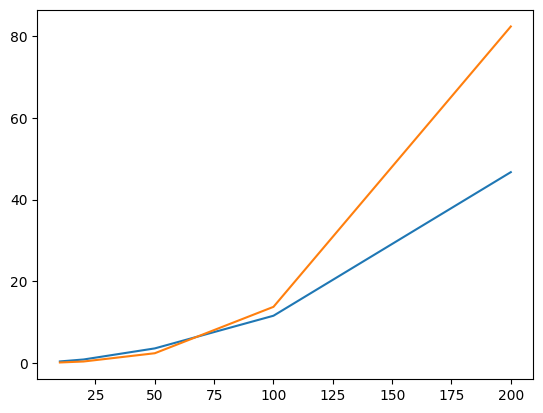

In [10]:
#comparing own and native kruskal algorithms by plotting
plt.plot(nodes_kruskal, kruskal_native_algorithm)
plt.plot(nodes_kruskal, kruskal_own_algorithm)
plt.show()

#### As we see, created algorithm is a little faster than native when graph nodex < 100 and slower than native when nodex > 100. This is because the native algorithm is optimally written by professionals

# Floyd-Warshall Algorithm

#### Task: write a function that will implement Floyd-Warshall's algorithm taking as an argument a graph generated using the module provided in the task (function gnp_random_connected_graph). Then compare developed algorithm with native one from imported library

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [11]:
G_floyd = gnp_random_connected_graph(7, 0.001, False, False)
G_floyd.edges(data=True)

EdgeDataView([(0, 1, {'weight': -2}), (1, 2, {'weight': 3}), (2, 5, {'weight': 1}), (3, 5, {'weight': 12}), (4, 6, {'weight': -5}), (5, 6, {'weight': 4})])

In [12]:
def create_table_for_floyd(graph, is_graph_directed):
    """
    Function that creates table for
    floyd algorithm using generated
    graph
    """
    N = len(graph.nodes)
    table = [[math.inf for _ in range(N)] for _ in range(N)]
    for x, y, w_dict in list(graph.edges(data=True)):
        table[x][x] = 0
        table[y][y] = 0
        if is_graph_directed:
            table[x][y] = w_dict['weight']
        else:
            table[x][y] = w_dict['weight']
            table[y][x] = w_dict['weight']
    return table

def floydworshal_algorithm(graph, is_graph_directed, table = None):
    """
    Floyd-Warshall algorithm implementation

    Args:
        graph: format from generation function - graph
        nodes: int - the sum of nodes
        is_graph_directred: bool - is graph directed?
    Returns:
    """
    if table == None:
        table = create_table_for_floyd(graph, is_graph_directed)
    N = len(graph.nodes)
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = table[i][k] + table[k][j]
                if i == j and d < 0:
                    return "Negative cycle detected!"
                if table[i][j] > d:
                    table[i][j] = d
    return table

#### Here you can see an example of using created Floyd-Warshall algorithm. Function returns List[List[int]] (matrix). Firstly function create_table_for_floyd() creates the table for algorithm using generated graph and then function floydworshall_algorithm() implements algorithm

In [13]:
floydworshal_algorithm(G_floyd, False)

'Negative cycle detected!'

## FLoyd-Warshall algrorithm time measuring

In [14]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance
nodes_for_floyd = [10, 20, 50]
NUM_OF_ITERATIONS = 1000

In [15]:
time_taken_imported = 0
floyd_native_algorithm = []
#For imported kruskal algorithm for 10, 20, 50 nodes graph
for node in nodes_for_floyd:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        graph_for_imported = gnp_random_connected_graph(node, 0.01, False)

        #measure time while algorithm is working
        start = time.time() #start
        try:
            pred, dist = floyd_warshall_predecessor_and_distance(graph_for_imported) #algorithm is working
        except:
            pass
        end = time.time() #end
        time_taken_imported += end - start
    floyd_native_algorithm.append(time_taken_imported)
    time_taken_imported / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:35<00:00, 28.05it/s]


In [16]:
time_taken_created = 0
floyd_own_algorithm = []
#For created floyd algorithm for 10, 20, 50 nodes graph
for node in nodes_for_floyd:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        geaph_for_created = gnp_random_connected_graph(node, 0.01, False)

        #measure time while algorithm is working
        start = time.time() #start
        floydworshal_algorithm(graph_for_imported, True)
        end = time.time() #end
        time_taken_created += end - start
    floyd_own_algorithm.append(time_taken_created)
    time_taken_created / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:31<00:00, 32.15it/s]


#### Here you can see comparing native and created algorithms and a graph that shows diference in time

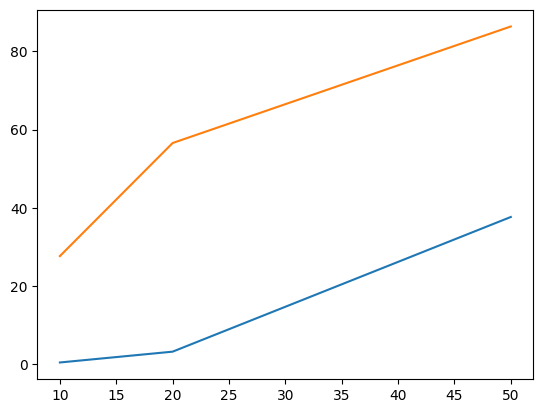

In [17]:
plt.plot(nodes_for_floyd, floyd_native_algorithm)
plt.plot(nodes_for_floyd, floyd_own_algorithm)
plt.show()

#### As you can see, created algorithm is always much slower than native one. This is because the native algorithm is optimally written by professionals

# Conslusion

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### As we can see we are able to create our own algorithms, but they will not be so fast as we want. So, instead of creating, we can use built-in algorithms. Or, also, it is possible to raise programming skills and create as fast created algorithms as native ones.